# MM1

In [ ]:
def mm1_queue_calculator(lambda_rate, mu_rate, drop_out_rate):
    # Step 1: Calculate the Gateway Utilization (p)
    p = (lambda_rate / mu_rate) * (1 - drop_out_rate)

    # Step 2: Calculate Resource Utilization (U)
    U = p  # since U = p in this case

    # Step 3: Calculate Mean Number of Customers in the System (E[n])
    if p < 1:  # To avoid division by zero if p = 1
        E_n = p / (1 - p)
    else:
        E_n = float('inf')  # Infinite customers in the system (queue is full)

    # Step 4: Calculate Response Time (E[r])
    if lambda_rate != 0:  # To avoid division by zero
        E_r = (1 / mu_rate) / (1 - p)
    else:
        E_r = 0  # No customers arriving

    # Step 5: Calculate Throughput (Throughput)
    throughput = lambda_rate  # Throughput is just the arrival rate

    # Step 6: Calculate Mean Waiting Time (E[w])
    if mu_rate != 0:  # To avoid division by zero
        E_w = E_r - (1 / mu_rate)
    else:
        E_w = 0

    # Step 7: Calculate Mean Number of Customers in the Queue (E[nq])
    E_nq = E_n - p

    # Return all results
    return {
        'Gateway Utilization (p)': p,
        'Mean # of customers in the system (E[n])': E_n,
        'Response Time (E[r])': E_r,
        'Mean Waiting Time (E[w])': E_w,
        'Mean # of customers in the queue (E[nq])': E_nq
    }



In [ ]:
lambda_rate1 = 5
mu_rate1 = 30    # Service rate (customers per hour)


drop_out_rate = 0.2  # Dropout rate

results1 = mm1_queue_calculator(lambda_rate1, mu_rate1, drop_out_rate)


# Print the results
print(mu_rate1)
print("{:<40} {:<20}".format("Metric", "Value"))
print("-" * 60)
for key, value in results1.items():
    print(f"{key:<40} {value:.6f}")



30
Metric                                   Value               
------------------------------------------------------------
Gateway Utilization (p)                  0.133333
Mean # of customers in the system (E[n]) 0.153846
Response Time (E[r])                     0.038462
Mean Waiting Time (E[w])                 0.005128
Mean # of customers in the queue (E[nq]) 0.020513


# Run lamda_rate from 0 to 50

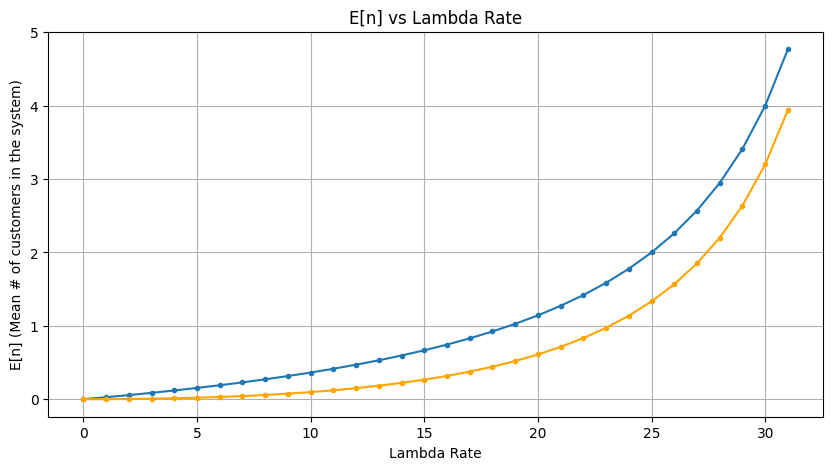

In [43]:
mu_rate1 = 30    # Service rate (customers per hour)
drop_out_rate = 0.2  # Dropout rate

lambda_rates = list(range(0, 32))
E_n_values = []
E_nq_values = []

for lambda_rate in lambda_rates:
  results = mm1_queue_calculator(lambda_rate, mu_rate1, drop_out_rate)
  E_n_values.append(results['Mean # of customers in the system (E[n])'])
  E_nq_values.append(results['Mean # of customers in the queue (E[nq])'])


import matplotlib.pyplot as plt

# Plot E[n] vs Lambda Rate
plt.figure(figsize=(10, 5))
plt.plot(lambda_rates, E_n_values, marker='.')
plt.plot(lambda_rates, E_nq_values, marker='.', color='orange')
plt.xlabel("Lambda Rate")
plt.ylabel("E[n] (Mean # of customers in the system)")
plt.title("E[n] vs Lambda Rate")
plt.grid(True)
plt.show()

# Plot E[nq] vs Lambda Rate
# plt.figure(figsize=(10, 5))
# plt.plot(lambda_rates, E_nq_values, marker='o', color='orange')
# plt.xlabel("Lambda Rate")
# plt.ylabel("E[nq] (Mean # of customers in the queue)")
# plt.title("E[nq] vs Lambda Rate")
# plt.grid(True)
# plt.show()

# MMC calculator

In [ ]:
import math

In [ ]:
def generate_lambda(arrival_rate, dropout_rate):
    lambda_to_router = arrival_rate*(1-dropout_rate)
    lambda_to_cus_dep = (1/3)*lambda_to_router
    lambda_to_tech_dep = (2/5)*lambda_to_router
    lambda_to_sales_dep = (31/75)*lambda_to_router

    return lambda_to_cus_dep, lambda_to_tech_dep, lambda_to_sales_dep

def mmc_queue_calculator(lambda_rate, mu_rate, c):
    rho = lambda_rate / (c * mu_rate)
    def erlang_c(c, rho):
        numerator = (c * rho) ** c / math.factorial(c) * 1 / (1 - rho)
        denominator = sum((c * rho) ** k / math.factorial(k) for k in range(c)) + numerator
        return numerator / denominator

    if rho >= 1:
        return {
            'Gateway Utilization (p)': rho,
            'Probability of customer forced to join the queue (C(c, ρ))': float('inf'),
            'Mean # of customers in the system (E[n])': float('inf'),
            'Mean Waiting Time (E[w])': float('inf'),
            'Mean # of customers in the queue (E[nq])': float('inf')
        }

    C_c_rho = erlang_c(c, rho)
    # Mean Number of Customers in the System (E[n])
    E_n = (rho * C_c_rho) / (1 - rho) + c * rho

    # Response Time (E[r])
    E_r = (1/mu_rate)*(1+(C_c_rho/(c*(1-rho))))

    # Mean Waiting Time (E[w])
    E_w = C_c_rho / (c*mu_rate*(1-rho))

    #Mean # of customer in the queue = p * l * (1 - p)
    E_nq = rho*C_c_rho*(1-rho)
    # Return all results
    return {
        'Gateway Utilization (p)': rho,
        'Probability of customer forced to join the queue (C(c, ρ))': C_c_rho,
        'Mean # of customers in the system (E[n])': E_n,
        'Response Time (E[r])': E_r,
        'Mean Waiting Time (E[w])': E_w,
        'Mean # of customers in the queue (E[nq])': E_nq

    }


In [ ]:
arrival_rate = 5
dropout_rate = 0.2
lambda_to_cus_dep , lambda_to_tech_dep, lambda_to_sales_dep =  generate_lambda(arrival_rate, dropout_rate)

service_rate_dep = 20
c = 3


results_cus_dep = mmc_queue_calculator(lambda_to_cus_dep, service_rate_dep, c)
results_tech_dep = mmc_queue_calculator(lambda_to_tech_dep, service_rate_dep, c)
results_sales_dep = mmc_queue_calculator(lambda_to_sales_dep, service_rate_dep, c)

print("Customer Dept:")
# Print the results to 4 decimal places
print("{:<60} {:<20}".format("Metric", "Value"))
print("-" * 60)
for key, value in results_cus_dep.items():
    print(f"{key:<60} {value:.6f}")

print("Technical Dept:")
print("{:<60} {:<20}".format("Metric", "Value"))
print("-" * 60)
for key, value in results_tech_dep.items():
    print(f"{key:<60} {value:.6f}")


print("sales and billing Dept:")
print("{:<60} {:<20}".format("Metric", "Value"))
print("-" * 60)
for key, value in results_sales_dep.items():
    print(f"{key:<60} {value:.6f}")

Customer Dept:
Metric                                                       Value               
------------------------------------------------------------
Gateway Utilization (p)                                      0.022222
Probability of customer forced to join the queue (C(c, ρ))   0.000047
Mean # of customers in the system (E[n])                     0.066668
Response Time (E[r])                                         0.050001
Mean Waiting Time (E[w])                                     0.000001
Mean # of customers in the queue (E[nq])                     0.000001
Technical Dept:
Metric                                                       Value               
------------------------------------------------------------
Gateway Utilization (p)                                      0.026667
Probability of customer forced to join the queue (C(c, ρ))   0.000081
Mean # of customers in the system (E[n])                     0.080002
Response Time (E[r])                                 

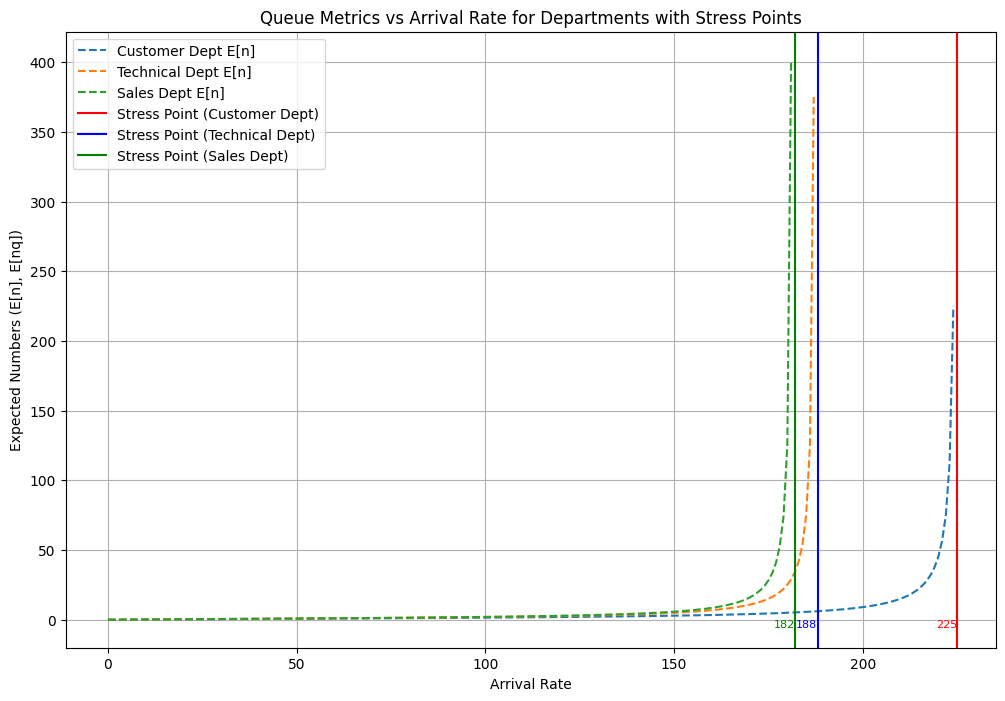

In [ ]:
# Parameters
dropout_rate = 0.2
service_rate_dep = 20
c = 3
arrival_rates = range(400)  # Extend range for higher loads

# Initialize results storage
results_cus_dep = {"E[n]": []}
results_tech_dep = {"E[n]": []}
results_sales_dep = {"E[n]": []}

# Stress points for plotting
stress_points = {
    "Customer Dept": None,
    "Technical Dept": None,
    "Sales Dept": None
}

# Run calculations and identify stress points
for arrival_rate in arrival_rates:
    lambda_to_cus_dep, lambda_to_tech_dep, lambda_to_sales_dep = generate_lambda(arrival_rate, dropout_rate)

    cus_dep_result = mmc_queue_calculator(lambda_to_cus_dep, service_rate_dep, c)
    tech_dep_result = mmc_queue_calculator(lambda_to_tech_dep, service_rate_dep, c)
    sales_dep_result = mmc_queue_calculator(lambda_to_sales_dep, service_rate_dep, c)

    results_cus_dep["E[n]"].append(cus_dep_result["Mean # of customers in the system (E[n])"])
    results_tech_dep["E[n]"].append(tech_dep_result["Mean # of customers in the system (E[n])"])
    results_sales_dep["E[n]"].append(sales_dep_result["Mean # of customers in the system (E[n])"])

    # Check for stress points
    if not stress_points["Customer Dept"] and cus_dep_result["Gateway Utilization (p)"] >= 1:
        stress_points["Customer Dept"] = arrival_rate
    if not stress_points["Technical Dept"] and tech_dep_result["Gateway Utilization (p)"] >= 1:
        stress_points["Technical Dept"] = arrival_rate
    if not stress_points["Sales Dept"] and sales_dep_result["Gateway Utilization (p)"] >= 1:
        stress_points["Sales Dept"] = arrival_rate

# Plot results with stress points
plt.figure(figsize=(12, 8))
plt.plot(arrival_rates, results_cus_dep["E[n]"], label="Customer Dept E[n]", linestyle='--')
plt.plot(arrival_rates, results_tech_dep["E[n]"], label="Technical Dept E[n]", linestyle='--')
plt.plot(arrival_rates, results_sales_dep["E[n]"], label="Sales Dept E[n]", linestyle='--')

# Add stress points to the chart
for dept, stress_point in stress_points.items():
    if stress_point:
        color = {'Customer Dept': 'red', 'Technical Dept': 'blue', 'Sales Dept': 'green'}[dept]
        plt.axvline(x=stress_point, color=color, label=f"Stress Point ({dept})")
        plt.text(stress_point, 0, f"{stress_point}", color=color, ha='right', va='top', fontsize=8, rotation=0)


        # stress_value = (results_cus_dep["E[n]"][stress_point] if dept == "Customer Dept" else
        #                 results_tech_dep["E[n]"][stress_point] if dept == "Technical Dept" else
        #                 results_sales_dep["E[n]"][stress_point])
        # # Mark the stress point with a dot
        # plt.scatter(stress_point, stress_value, color=color, zorder=5, label=f"Point of Stress ({dept})")


plt.xlabel("Arrival Rate")
plt.ylabel("Expected Numbers (E[n], E[nq])")
plt.title("Queue Metrics vs Arrival Rate for Departments with Stress Points")
plt.legend()
plt.grid()
plt.show()